In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
BES_Panel = pd.read_stata("../BES_analysis_data/BES2015_W8_Panel_v1.3.dta")

In [10]:
pd.DataFrame(BES_Panel.columns).to_csv("BES_Panel_columns.csv")

In [2]:
BES_numerics_only = pd.read_hdf("..\BES_analysis_data\W8Panel_numerics_only.hdf")

In [3]:
counts = BES_numerics_only.count()
counts

id                                56190
ukCitizenW1                       30360
euCitizenW1                       30360
commonwealthCitizenW1             30360
otherCitizenW1                    30360
turnoutUKGeneralW1                29457
turnoutUKGeneralW2                29503
turnoutUKGeneralW3                27282
turnoutUKGeneralW4                30816
turnoutUKGeneralW5                26868
generalElectionCertaintyW1        24173
generalElectionCertaintyW2        24788
generalElectionCertaintyW3        22670
generalElectionCertaintyW4        27017
generalElectionCertaintyUnsqW5    19284
generalElectionCertaintySqW5       4772
generalElectionCertaintyW5        24056
partyIdStrengthW1                 25662
partyIdStrengthW2                 25960
partyIdStrengthW3                 23792
partyIdStrengthW4                 26955
partyIdStrengthW6                 26486
partyIdEUW7                       23223
partyIdEUW8                       23939
polAttentionW1                    30176


In [7]:
1 - counts/BES_numerics_only.shape[0]

id                                0.000000
ukCitizenW1                       0.459690
euCitizenW1                       0.459690
commonwealthCitizenW1             0.459690
otherCitizenW1                    0.459690
turnoutUKGeneralW1                0.475761
turnoutUKGeneralW2                0.474942
turnoutUKGeneralW3                0.514469
turnoutUKGeneralW4                0.451575
turnoutUKGeneralW5                0.521837
generalElectionCertaintyW1        0.569799
generalElectionCertaintyW2        0.558854
generalElectionCertaintyW3        0.596547
generalElectionCertaintyW4        0.519185
generalElectionCertaintyUnsqW5    0.656807
generalElectionCertaintySqW5      0.915074
generalElectionCertaintyW5        0.571881
partyIdStrengthW1                 0.543300
partyIdStrengthW2                 0.537996
partyIdStrengthW3                 0.576579
partyIdStrengthW4                 0.520288
partyIdStrengthW6                 0.528635
partyIdEUW7                       0.586706
partyIdEUW8

In [ ]:
BES_and_counts = pd.concat([ BES_numerics_only,  ])

In [ ]:
variable_categories = pd.read_csv("question_categories_correct.csv", encoding = "ISO-8859-1")

var_cat_dict = dict()
for typ in [1,2,3,4,5,6]:
    e = variable_categories[variable_categories.type==typ]["column_name"].values
    var_cat_dict[typ] = [item for sublist in [i.split("|") for i in e] for item in sublist]

var_type = pd.DataFrame(columns = ['type'] )
for col in BES.columns:
    dt = BES[col].dtype.name
    if ( dt!='category' ) and ( dt!='float64' ):
        var_type.loc[col] = -1
    
    elif ( dt=='float64' ) and (col in ['personality_agreeableness', 'personality_conscientiousness','personality_extraversion', 'personality_neuroticism','personality_openness','mapNamesW3','riskScaleW8']):
        var_type.loc[col] = 0

    elif ( dt=='float64' ):
        var_type.loc[col] = -1

    elif ( dt=='category' ):
        for typ in [1,2,3,4,5,6]:
            if col in var_cat_dict[typ]:
                var_type.loc[col] = typ
    else:
        print("what's up with this? " + col)
var_type["type"] = var_type["type"].astype("int8")



In [32]:
BES_Panel["immigEconW7"].count()

30895

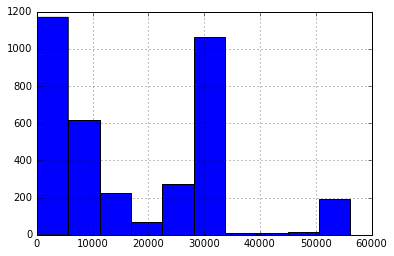

In [37]:
BES_Panel.count().hist()

In [42]:
england_only = BES_Panel["country"]=="England"
sum(england_only)

37155

In [55]:
sum(BES_numerics_only.count())/(BES_numerics_only.shape[0]*BES_numerics_only.shape[1])

0.2480226380651393

In [66]:
BES_numerics_only.shape

(56190, 3163)

In [59]:
zero_vals = BES_numerics_only[england_only].count()~=0
sum(zero_vals)

80

In [63]:
BES_eng = BES_numerics_only.loc[england_only,~zero_vals]

In [64]:
BES_eng.shape

(37155, 3083)

In [65]:
sum(BES_eng.count())/(BES_eng.shape[0]*BES_eng.shape[1])

0.26368002860613243

In [75]:
eu_Ref_only = ~BES_eng["euRefVoteW8"].isnull()

In [77]:
zero_vals = BES_eng[eu_Ref_only].count()==0
sum(zero_vals)

24

In [78]:
BES_eng_eu = BES_eng.loc[eu_Ref_only,~zero_vals]
BES_eng_eu.shape

(17979, 3059)

In [81]:
sum(BES_eng_eu.count())/(BES_eng_eu.shape[0]*BES_eng_eu.shape[1])

0.33537343456581803

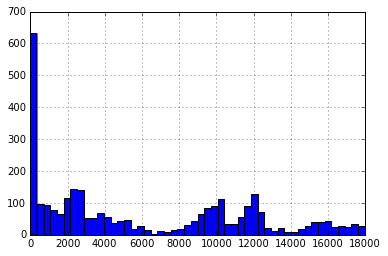

In [83]:
BES_eng_eu.count().hist(bins=50)

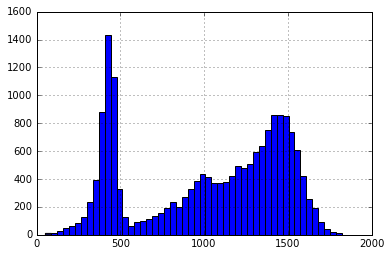

In [84]:
BES_eng_eu.count(axis=1).hist(bins=50)

In [6]:
import gc
gc.collect()

0

In [4]:
cov = np.ma.cov(BES_numerics_only.drop("id",axis=1))

MemoryError: 

In [5]:
BES_numerics_only.shape

(56190, 3163)

In [7]:
BES_cov = BES_numerics_only.drop("id",axis=1).cov()

In [8]:
BES_cov.shape

(3162, 3162)

In [9]:
BES_cov

,ukCitizenW1,euCitizenW1,commonwealthCitizenW1,otherCitizenW1,turnoutUKGeneralW1,turnoutUKGeneralW2,turnoutUKGeneralW3,turnoutUKGeneralW4,turnoutUKGeneralW5,generalElectionCertaintyW1,...,selfNumEmployeesLast,fatherNumEmployees,motherNumEmployees,selfOccStatus,selfOccStatusLast,riskTaking,edlevel,profile_turnout_2015,lr_scale,al_scale
ukCitizenW1,0.021677,-0.012190,-0.003515,-0.005168,0.019953,0.016474,0.014102,0.017000,0.019002,0.006015,...,-0.004148,0.000488,-0.030444,0.000614,0.000560,-0.000453,-0.011561,-0.006320,-0.008375,0.029927
euCitizenW1,-0.012190,0.039781,0.019068,0.000913,-0.006342,-0.004438,-0.003671,-0.007063,-0.008511,-0.006634,...,0.003576,-0.002509,0.003715,-0.000781,-0.001362,0.004719,0.027247,0.004173,0.002362,-0.119892
commonwealthCitizenW1,-0.003515,0.019068,0.027836,0.001016,0.002566,0.003537,0.002650,0.003529,0.003422,-0.004639,...,-0.002887,0.001057,0.037221,-0.000743,-0.000364,0.003222,0.018634,-0.000529,0.003113,-0.074181
otherCitizenW1,-0.005168,0.000913,0.001016,0.010429,-0.005746,-0.004804,-0.004210,-0.003727,-0.005070,-0.001205,...,-0.000962,-0.000310,0.006398,-0.000492,-0.000029,0.000004,0.005284,0.001608,-0.001165,-0.018590
turnoutUKGeneralW1,0.019953,-0.006342,0.002566,-0.005746,1.125170,0.735572,0.698382,0.654124,0.589156,0.185891,...,-0.005167,-0.006661,-0.105769,-0.015793,0.003370,0.008025,0.113869,-0.124576,0.133087,-0.204631
turnoutUKGeneralW2,0.016474,-0.004438,0.003537,-0.004804,0.735572,0.957116,0.685874,0.631159,0.567030,0.134092,...,0.001767,0.003289,-0.079811,-0.016043,0.002835,0.013118,0.098247,-0.123938,0.056508,-0.217968
turnoutUKGeneralW3,0.014102,-0.003671,0.002650,-0.004210,0.698382,0.685874,0.945101,0.662896,0.577568,0.131542,...,0.003998,-0.005733,-0.008543,-0.014012,0.001575,0.000994,0.090592,-0.125078,0.070340,-0.189324
turnoutUKGeneralW4,0.017000,-0.007063,0.003529,-0.003727,0.654124,0.631159,0.662896,0.946658,0.677429,0.113053,...,0.004230,-0.006450,-0.032952,-0.012569,0.001393,0.005559,0.092194,-0.140055,0.043652,-0.213024
turnoutUKGeneralW5,0.019002,-0.008511,0.003422,-0.005070,0.589156,0.567030,0.577568,0.677429,0.795694,0.088774,...,0.001453,0.001669,-0.018009,-0.009873,0.004084,0.011149,0.096860,-0.153851,0.063593,-0.224595
generalElectionCertaintyW1,0.006015,-0.006634,-0.004639,-0.001205,0.185891,0.134092,0.131542,0.113053,0.088774,1.116884,...,0.002276,-0.008209,-0.099399,-0.012385,-0.004582,0.011239,-0.148343,-0.014297,-0.230333,0.384453


In [10]:
BES_cov.to_csv("BES_cov.csv")